# 1. Exploratory Data Analysis

In this notebook, I will explore the raw data I pulled from Kaggle.

I wanted golf scores with weather data, but that was hard to come by so I grabbed some PGA scores over the past few years and Boston weather data from the past 10 years and I will match rounds with dates as best as I can to get a working ML prediction model running.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read and inspect weather data
df_boston = pd.read_csv('../data/raw/boston_weather_data.csv')

In [3]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3653 entries, 0 to 3652
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    3653 non-null   object 
 1   tavg    3652 non-null   float64
 2   tmin    3653 non-null   float64
 3   tmax    3653 non-null   float64
 4   prcp    3653 non-null   float64
 5   wdir    3066 non-null   float64
 6   wspd    3653 non-null   float64
 7   pres    3492 non-null   float64
dtypes: float64(7), object(1)
memory usage: 228.4+ KB


In [4]:
df_boston.head()

,time,tavg,tmin,tmax,prcp,wdir,wspd,pres
0,2013-03-01,3.2,1.1,5.0,0.0,342.0,15.1,1002.7
1,2013-03-02,3.1,1.1,5.6,0.0,307.0,14.4,1004.2
2,2013-03-03,2.6,0.6,6.1,0.0,NaN,14.4,1002.6
3,2013-03-04,1.8,-0.6,5.0,0.0,303.0,28.1,1003.0
4,2013-03-05,2.9,0.0,6.1,0.0,NaN,16.6,1013.5


In [5]:
# convert dates in weather df to datetime
df_boston['time'] = pd.to_datetime(df_boston['time'])

In [6]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3653 entries, 0 to 3652
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    3653 non-null   datetime64[ns]
 1   tavg    3652 non-null   float64       
 2   tmin    3653 non-null   float64       
 3   tmax    3653 non-null   float64       
 4   prcp    3653 non-null   float64       
 5   wdir    3066 non-null   float64       
 6   wspd    3653 non-null   float64       
 7   pres    3492 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 228.4 KB


In [7]:
# drop unnecessary columns
df_boston.drop(columns=['tmin', 'tmax', 'wdir', 'pres'], inplace=True)

In [8]:
# grab most recent dates (this wont happen in the ETL)
df_boston = df_boston[df_boston['time'] >= '2017-04-01']

In [9]:
df_boston

,time,tavg,prcp,wspd
1492,2017-04-01,1.8,39.6,31.7
1493,2017-04-02,4.8,0.0,15.1
1494,2017-04-03,8.2,0.0,14.4
1495,2017-04-04,5.3,17.3,26.6
1496,2017-04-05,4.2,0.0,13.3
...,...,...,...,...
3648,2023-02-25,-7.9,0.3,11.9
3649,2023-02-26,-4.2,0.0,11.9
3650,2023-02-27,-1.7,0.0,18.7
3651,2023-02-28,0.6,7.1,23.8


In [10]:
# read and inspect golf data
df_golf = pd.read_csv('../data/raw/golf_mass.csv')

In [11]:
df_golf

,Year,Name,Course,Yards,Par,Open.Position,Integer.Position,Position.Grouping,Open.R1,Open.R2,...,DistanceOfPuttAVG,SGAroundTheGreenAVG,SGOffTheTeeAVG,SGTeeToGreenAVG,SGTeeToGreenAVGOTT,SGTeeToGreenAVGAPR,SGTeeToGreenAVGARG,SGTeeToGreenAVGPUTT,SGTotalAVG,BirdOrBetterFromFairway.
0,2021,Collin Morikawa,Royal St Georges,7189,70,1,1,1,67,64,...,"70' 7""",0.077,0.281,1.528,0.281,1.170,0.077,-0.457,1.071,26.16
1,2021,Jordan Spieth,Royal St Georges,7189,70,2,2,1,65,67,...,"77' 2""",0.407,-0.091,0.680,-0.091,0.365,0.407,0.389,1.069,28.21
2,2021,Dylan Frittelli,Royal St Georges,7189,70,5,5,1,66,67,...,"66' 4""",0.312,0.029,0.009,0.029,-0.333,0.312,-0.470,-0.461,21.81
3,2021,Kevin Kisner,Royal St Georges,7189,70,73,73,8,70,69,...,"78' 7""",0.085,-0.215,-0.396,-0.215,-0.266,0.085,0.392,-0.003,24.03
4,2021,Phil Mickelson,Royal St Georges,7189,70,CUT,90,10,80,72,...,"74' 9""",-0.107,-0.161,-0.410,-0.161,-0.142,-0.107,-0.032,-0.442,22.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1974,1993,Dan Forsman,Royal St Georges,6860,70,T73,73,8,71,70,...,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00
1975,1993,Wayne Grady,Royal St Georges,6860,70,T9,9,1,74,68,...,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00
1976,1993,Scott Simpson,Royal St Georges,6860,70,T9,9,1,68,70,...,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00
1977,1993,Fred Couples,Royal St Georges,6860,70,T9,9,1,68,66,...,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00


Convert Name to a number to use as a player ID (could keep name as well and just assign an ID to each)

extract all 4 rounds scores per player so we have a table of player, round num, round score, date(needs to be generated somewhat randomly), and handicap ( can calc this on our own and never update it in the db or have it built into site to update at request). We need to have it be incremental for overall rounds by the player and that needs to be ordered by date when calculating.

The year can stay the same and we can just use the same years from the weather data from boston

our course par is 72 and it is located in boston

make sure the months assigned are between april and october. (typical golf season in New England)

In [12]:
# player id creator
def create_player_id_mapping(df, column):
    """Create player ID mapping from names"""
    unique_players = df[column].unique()
    player_mapping = {name: idx + 1 for idx, name in enumerate(unique_players)}
    return player_mapping

#test
print(create_player_id_mapping(df_golf, 'Name'))

{'Collin Morikawa': 1, 'Jordan Spieth': 2, 'Dylan Frittelli': 3, 'Kevin Kisner': 4, 'Phil Mickelson': 5, 'Adam Long': 6, 'Garrick Higgo': 7, 'Thomas Detry': 8, 'Rikuya Hoshino': 9, 'Matt Kuchar': 10, 'Jason Day': 11, 'Carlos Ortiz': 12, 'Alex Noren': 13, 'John Catlin': 14, 'Jason Scrivener': 15, 'Troy Merritt': 16, 'Stewart Cink': 17, 'Patrick Reed': 18, 'Patrick Cantlay': 19, 'Matt Jones': 20, 'Lucas Herbert': 21, 'Gary Woodland': 22, 'Erik van Rooyen': 23, 'Charley Hoffman': 24, 'Brendon Todd': 25, 'Branden Grace': 26, 'Victor Perez': 27, 'Tyrrell Hatton': 28, 'Takumi Kanaya': 29, 'Ryan Palmer': 30, 'Russell Henley': 31, 'Martin Kaymer': 32, 'Marc Leishman': 33, 'Keegan Bradley': 34, 'Harold Varner III': 35, 'Guido Migliozzi': 36, 'Chris Kirk': 37, 'Viktor Hovland': 38, 'Shane Lowry': 39, 'Emiliano Grillo': 40, 'Tony Finau': 41, 'Paul Casey': 42, 'Corey Conners': 43, 'Webb Simpson': 44, 'Sergio Garcia': 45, 'Kevin Streelman': 46, 'Brian Harman': 47, 'Xander Schauffele': 48, 'Jason Ko

In [13]:
# map player ids to players
player_mappings = create_player_id_mapping(df_golf, 'Name')
df_golf['player_id'] = df_golf['Name'].map(player_mappings)

In [14]:
# grab relevant subset of data and inspect
df_golf_condensed = df_golf[['player_id', 'Name', 'Open.R1', 'Open.R2', 'Open.R3', 'Open.R4']]

In [15]:
df_golf_condensed.shape

(1979, 6)

In [16]:
df_golf_condensed[df_golf_condensed['Name'] == 'Brian Davis']

,player_id,Name,Open.R1,Open.R2,Open.R3,Open.R4
762,250,Brian Davis,75,76,0,0
1197,250,Brian Davis,77,71,0,0
1258,250,Brian Davis,72,77,0,0


Taking out the world ranking and year columns. i'll make those myself later. ranking will be done by handicap

In [17]:
# pivot the data so we have a record for each of the 4 rounds in each record (Open.R1, Open.R2, ..., etc)
id_vars = ['player_id', 'Name']
value_vars = ['Open.R1', 'Open.R2', 'Open.R3', 'Open.R4']

In [18]:
pivoted_df_golf = df_golf_condensed.melt(id_vars=id_vars, value_vars=value_vars, var_name='Round', value_name='Score')

In [19]:
# result. Round column will be changed to the incremental round they've played here
pivoted_df_golf

,player_id,Name,Round,Score
0,1,Collin Morikawa,Open.R1,67
1,2,Jordan Spieth,Open.R1,65
2,3,Dylan Frittelli,Open.R1,66
3,4,Kevin Kisner,Open.R1,70
4,5,Phil Mickelson,Open.R1,80
...,...,...,...,...
7911,465,Dan Forsman,Open.R4,73
7912,466,Wayne Grady,Open.R4,69
7913,445,Scott Simpson,Open.R4,66
7914,315,Fred Couples,Open.R4,69


In [20]:
pivoted_df_golf[pivoted_df_golf['Name'] == 'Brian Davis']

,player_id,Name,Round,Score
762,250,Brian Davis,Open.R1,75
1197,250,Brian Davis,Open.R1,77
1258,250,Brian Davis,Open.R1,72
2741,250,Brian Davis,Open.R2,76
3176,250,Brian Davis,Open.R2,71
3237,250,Brian Davis,Open.R2,77
4720,250,Brian Davis,Open.R3,0
5155,250,Brian Davis,Open.R3,0
5216,250,Brian Davis,Open.R3,0
6699,250,Brian Davis,Open.R4,0


In [21]:
# get rid of scores of 0 (in the raw data, this is weekend rounds if player did not make cut for tourney)
pivoted_df_golf_clean = pivoted_df_golf[pivoted_df_golf['Score'] != 0]

In [22]:
pivoted_df_golf_clean[pivoted_df_golf_clean['Name'] == 'Brian Davis']

,player_id,Name,Round,Score
762,250,Brian Davis,Open.R1,75
1197,250,Brian Davis,Open.R1,77
1258,250,Brian Davis,Open.R1,72
2741,250,Brian Davis,Open.R2,76
3176,250,Brian Davis,Open.R2,71
3237,250,Brian Davis,Open.R2,77


In [23]:
# date of round - random and will be mapped to a record from the weather df
import random

len(pivoted_df_golf_clean)
dates = []
for i in range(len(pivoted_df_golf_clean)):
    year = random.randint(2017, 2022)
    month = random.randint(4, 10)
    day = random.randint(1, 28)
    dates.append(f'{year}-{month:02d}-{day:02d}')

print(dates[0:20])


['2020-06-09', '2022-08-17', '2020-09-19', '2022-04-12', '2021-08-19', '2018-08-08', '2017-10-28', '2021-06-26', '2019-04-17', '2021-08-04', '2020-08-05', '2017-04-06', '2017-09-22', '2018-09-24', '2018-04-24', '2022-04-03', '2021-06-24', '2019-08-13', '2017-05-05', '2020-04-18']


In [24]:
# fix date format to be datetime instead of object
dates = pd.to_datetime(dates)
pivoted_df_golf_clean['date'] = dates

/var/folders/ng/d65v34c953gc8n4cp3s9v6wm0000gn/T/ipykernel_2827/3241994968.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivoted_df_golf_clean['date'] = dates


In [25]:
pivoted_df_golf_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6434 entries, 0 to 7915
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   player_id  6434 non-null   int64         
 1   Name       6434 non-null   object        
 2   Round      6434 non-null   object        
 3   Score      6434 non-null   int64         
 4   date       6434 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 301.6+ KB


In [26]:
pivoted_df_golf_clean.sort_values(by='date')

,player_id,Name,Round,Score,date
1733,337,Nick Price,Open.R1,78,2017-04-01
2524,189,Mikko Ilonen,Open.R2,78,2017-04-01
5440,377,Loren Roberts,Open.R3,70,2017-04-01
2639,228,Bo Van Pelt,Open.R2,73,2017-04-01
2771,133,Charl Schwartzel,Open.R2,67,2017-04-02
...,...,...,...,...,...
1824,377,Loren Roberts,Open.R1,67,2022-10-28
5457,191,Padraig Harrington,Open.R3,74,2022-10-28
1194,337,Nick Price,Open.R1,76,2022-10-28
3131,323,Greg Owen,Open.R2,73,2022-10-28


In [27]:
pivoted_df_golf_clean[pivoted_df_golf_clean['Name'] == 'Brian Davis'].sort_values(by='date')

,player_id,Name,Round,Score,date
1197,250,Brian Davis,Open.R1,77,2017-06-27
3176,250,Brian Davis,Open.R2,71,2018-04-01
1258,250,Brian Davis,Open.R1,72,2018-08-10
2741,250,Brian Davis,Open.R2,76,2021-04-24
3237,250,Brian Davis,Open.R2,77,2022-06-04
762,250,Brian Davis,Open.R1,75,2022-07-17


In [28]:
# increment rounds for each player in the Round column
pivoted_df_golf_clean['Round'] = pivoted_df_golf_clean.sort_values(by='date').groupby('Name').cumcount() + 1

/var/folders/ng/d65v34c953gc8n4cp3s9v6wm0000gn/T/ipykernel_2827/3685527745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivoted_df_golf_clean['Round'] = pivoted_df_golf_clean.sort_values(by='date').groupby('Name').cumcount() + 1


In [29]:
pivoted_df_golf_clean[pivoted_df_golf_clean['Name'] == 'Brian Davis'].sort_values(by='date')

,player_id,Name,Round,Score,date
1197,250,Brian Davis,1,77,2017-06-27
3176,250,Brian Davis,2,71,2018-04-01
1258,250,Brian Davis,3,72,2018-08-10
2741,250,Brian Davis,4,76,2021-04-24
3237,250,Brian Davis,5,77,2022-06-04
762,250,Brian Davis,6,75,2022-07-17


The golf data looks good now. Need to add some fields and merge with the weather data for further analysis

In [30]:
# handicap calculator
def handicap_calc(scores):
    differentials = []
    rounds = 20
    if len(scores) < rounds:
        rounds = len(scores)

    for i in range(0, rounds):
        differential = round(((scores[-i] - 67.3) * 113) / 119, 1)
        differentials.append(differential)

    differentials.sort()
    average = sum(differentials) / len(differentials)

    return round(average * 0.96, 1)


#test
scores = [70, 76, 89, 90, 72]
print(handicap_calc(scores))

11.1


In [31]:
# handicap calc. our course par and slope rating are fixed into the algorithm, assuming everyone only plays at my course
def map_handicaps(df):
    unique_ids = df['player_id'].unique()
    handicaps = {}

    for id in unique_ids:
        scores = df[df['player_id'] == id]['Score'].tolist()
        handicaps[id] = handicap_calc(scores)

    return handicaps

In [32]:
# map the handicaps to each player
player_handicaps = map_handicaps(pivoted_df_golf_clean)
pivoted_df_golf_clean['Handicap'] = pivoted_df_golf_clean['player_id'].map(player_handicaps)

/var/folders/ng/d65v34c953gc8n4cp3s9v6wm0000gn/T/ipykernel_2827/1931438597.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivoted_df_golf_clean['Handicap'] = pivoted_df_golf_clean['player_id'].map(player_handicaps)


In [33]:
pivoted_df_golf_clean.head(10)

,player_id,Name,Round,Score,date,Handicap
0,1,Collin Morikawa,4,67,2020-06-09,-0.9
1,2,Jordan Spieth,27,65,2022-08-17,2.2
2,3,Dylan Frittelli,5,66,2020-09-19,3.5
3,4,Kevin Kisner,18,70,2022-04-12,4.2
4,5,Phil Mickelson,69,80,2021-08-19,3.8
5,6,Adam Long,1,72,2018-08-08,6.6
6,7,Garrick Higgo,1,73,2017-10-28,6.1
7,8,Thomas Detry,2,72,2021-06-26,5.2
8,9,Rikuya Hoshino,1,74,2019-04-17,5.2
9,10,Matt Kuchar,38,74,2021-08-04,4.0


In [34]:
pivoted_df_golf_clean[pivoted_df_golf_clean['Name'] == 'Brian Davis'].sort_values(by='date')

,player_id,Name,Round,Score,date,Handicap
1197,250,Brian Davis,1,77,2017-06-27,6.7
3176,250,Brian Davis,2,71,2018-04-01,6.7
1258,250,Brian Davis,3,72,2018-08-10,6.7
2741,250,Brian Davis,4,76,2021-04-24,6.7
3237,250,Brian Davis,5,77,2022-06-04,6.7
762,250,Brian Davis,6,75,2022-07-17,6.7


we can join the weather and round tables on date

In [35]:
pivoted_df_golf_clean.describe()

,player_id,Round,Score,date,Handicap
count,6434.000000,6434.000000,6434.000000,6434,6434.000000
mean,205.104445,15.728163,72.145166,2020-01-25 12:08:16.860428800,4.453295
min,1.000000,1.000000,62.000000,2017-04-01 00:00:00,-0.900000
25%,86.000000,4.000000,70.000000,2018-07-28 00:00:00,3.800000
50%,201.000000,10.000000,72.000000,2020-04-06 00:00:00,4.300000
75%,315.000000,21.000000,74.000000,2021-07-16 00:00:00,5.100000
max,466.000000,114.000000,89.000000,2022-10-28 00:00:00,14.800000
std,128.868676,16.156969,3.364956,NaN,1.127300


In [36]:
df_boston.describe()

,time,tavg,prcp,wspd
count,2161,2161.000000,2161.000000,2161.000000
mean,2020-03-16 00:00:00,11.978066,3.096529,17.710643
min,2017-04-01 00:00:00,-17.800000,0.000000,2.500000
25%,2018-09-23 00:00:00,4.300000,0.000000,13.700000
50%,2020-03-16 00:00:00,11.600000,0.000000,16.600000
75%,2021-09-07 00:00:00,20.300000,1.800000,21.200000
max,2023-03-01 00:00:00,32.300000,68.100000,61.200000
std,NaN,9.430919,7.593484,6.062528


In [37]:
# merge tables on date and inspect
df = pivoted_df_golf_clean.merge(df_boston, how='left', left_on='date', right_on='time')

In [38]:
df.head(10)

,player_id,Name,Round,Score,date,Handicap,time,tavg,prcp,wspd
0,1,Collin Morikawa,4,67,2020-06-09,-0.9,2020-06-09,19.6,0.0,9.0
1,2,Jordan Spieth,27,65,2022-08-17,2.2,2022-08-17,21.3,0.3,19.8
2,3,Dylan Frittelli,5,66,2020-09-19,3.5,2020-09-19,12.0,0.0,16.9
3,4,Kevin Kisner,18,70,2022-04-12,4.2,2022-04-12,13.2,0.8,15.5
4,5,Phil Mickelson,69,80,2021-08-19,3.8,2021-08-19,25.1,29.0,16.9
5,6,Adam Long,1,72,2018-08-08,6.6,2018-08-08,26.6,24.9,11.2
6,7,Garrick Higgo,1,73,2017-10-28,6.1,2017-10-28,13.3,0.0,14.0
7,8,Thomas Detry,2,72,2021-06-26,5.2,2021-06-26,23.1,0.0,22.0
8,9,Rikuya Hoshino,1,74,2019-04-17,5.2,2019-04-17,10.8,0.0,19.4
9,10,Matt Kuchar,38,74,2021-08-04,4.0,2021-08-04,22.0,14.7,12.2


In [39]:
# dont need two date columns
df.drop(columns='time', inplace=True)

In [40]:
column_names = ['player_id', 'name', 'round', 'score', 'date', 'handicap', 'avg_temp', 'precipitation', 'wind_speed']
df.columns = column_names

In [41]:
df.info() # no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6434 entries, 0 to 6433
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   player_id      6434 non-null   int64         
 1   name           6434 non-null   object        
 2   round          6434 non-null   int64         
 3   score          6434 non-null   int64         
 4   date           6434 non-null   datetime64[ns]
 5   handicap       6434 non-null   float64       
 6   avg_temp       6434 non-null   float64       
 7   precipitation  6434 non-null   float64       
 8   wind_speed     6434 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(1)
memory usage: 452.5+ KB


In [42]:
from scripts import conversions as c

# convert km to miles and celsius to fahrenheit
df['wind_speed'] = round(df['wind_speed'].apply(c.k_to_m), 2)
df['avg_temp'] = round(df['avg_temp'].apply(c.c_to_f), 2)

In [43]:
df.sample(10)

,player_id,name,round,score,date,handicap,avg_temp,precipitation,wind_speed
1457,110,Henrik Stenson,29,75,2019-05-20,3.1,72.68,3.3,14.29
1654,413,Brian Watts,5,68,2019-05-03,5.2,48.02,2.8,6.71
3683,246,Greg Chalmers,5,75,2021-07-14,5.1,68.90,0.0,4.72
5991,337,Nick Price,26,77,2019-09-10,4.6,66.74,0.0,7.58
5710,244,Simon Dyson,10,70,2021-05-13,3.5,60.44,0.0,7.39
4457,70,Rickie Fowler,13,68,2018-06-06,2.4,56.48,0.0,9.38
85,86,Dustin Johnson,18,68,2019-08-23,4.0,77.90,0.0,9.63
308,149,Jason Dufner,5,73,2018-04-17,4.4,46.94,0.0,15.41
3184,165,Sean O'Hair,23,67,2021-10-15,5.3,64.58,0.0,8.08
1614,411,Andrew Magee,2,77,2017-07-17,5.5,75.74,0.0,8.51


In [44]:
# check for most rounds played in a single day to see if data makes sense
df['date'].value_counts(ascending=False)

date
2018-10-15    14
2018-08-18    14
2019-08-13    13
2022-04-02    13
2022-08-03    13
              ..
2021-10-27     1
2021-04-26     1
2017-09-02     1
2017-05-06     1
2022-07-15     1
Name: count, Length: 1170, dtype: int64

In [45]:
df.loc[df['date']=='2019-05-23']

,player_id,name,round,score,date,handicap,avg_temp,precipitation,wind_speed
130,107,Rory Sabbatini,14,70,2019-05-23,5.6,60.62,3.0,14.98
3951,39,Shane Lowry,8,69,2019-05-23,3.1,60.62,3.0,14.98
4092,140,Chris Wood,6,66,2019-05-23,4.0,60.62,3.0,14.98
4408,116,Kyle Stanley,5,70,2019-05-23,4.6,60.62,3.0,14.98
5129,337,Nick Price,22,67,2019-05-23,4.6,60.62,3.0,14.98
5204,48,Xander Schauffele,6,65,2019-05-23,2.5,60.62,3.0,14.98
5969,344,Chris Riley,6,75,2019-05-23,5.1,60.62,3.0,14.98


In [46]:
# making sure rounds and dates are sorted correctly
df.loc[df['name']=='Phil Mickelson'].sort_values(by='round')

,player_id,name,round,score,date,handicap,avg_temp,precipitation,wind_speed
234,5,Phil Mickelson,1,73,2017-04-02,3.8,40.64,0.0,9.38
2331,5,Phil Mickelson,2,69,2017-04-26,3.8,50.18,14.2,10.07
3217,5,Phil Mickelson,3,67,2017-05-14,3.8,47.84,24.1,17.90
5682,5,Phil Mickelson,4,68,2017-07-19,3.8,79.34,0.0,8.95
3127,5,Phil Mickelson,5,71,2017-07-21,3.8,81.14,0.0,10.31
...,...,...,...,...,...,...,...,...,...
5975,5,Phil Mickelson,80,68,2022-06-15,3.8,67.82,0.0,8.70
477,5,Phil Mickelson,81,70,2022-07-20,3.8,84.02,0.0,9.20
353,5,Phil Mickelson,82,63,2022-08-20,3.8,79.34,0.0,8.08
4500,5,Phil Mickelson,83,70,2022-09-04,3.8,71.42,0.0,8.95


In [47]:
import datetime
# add day of week column (could be a feature for ML)
df['day_of_week'] =  df['date'].map(datetime.datetime.weekday)

In [48]:
# 0 is Monday, 6 is Sunday
df

,player_id,name,round,score,date,handicap,avg_temp,precipitation,wind_speed,day_of_week
0,1,Collin Morikawa,4,67,2020-06-09,-0.9,67.28,0.0,5.59,1
1,2,Jordan Spieth,27,65,2022-08-17,2.2,70.34,0.3,12.30,2
2,3,Dylan Frittelli,5,66,2020-09-19,3.5,53.60,0.0,10.50,5
3,4,Kevin Kisner,18,70,2022-04-12,4.2,55.76,0.8,9.63,1
4,5,Phil Mickelson,69,80,2021-08-19,3.8,77.18,29.0,10.50,3
...,...,...,...,...,...,...,...,...,...,...
6429,465,Dan Forsman,3,73,2017-10-14,4.8,59.90,2.5,3.11,5
6430,466,Wayne Grady,2,69,2018-07-04,1.3,84.02,0.0,6.28,2
6431,445,Scott Simpson,7,66,2022-05-02,2.2,51.08,4.1,9.38,0
6432,315,Fred Couples,9,69,2018-08-12,3.9,70.16,35.1,8.51,6


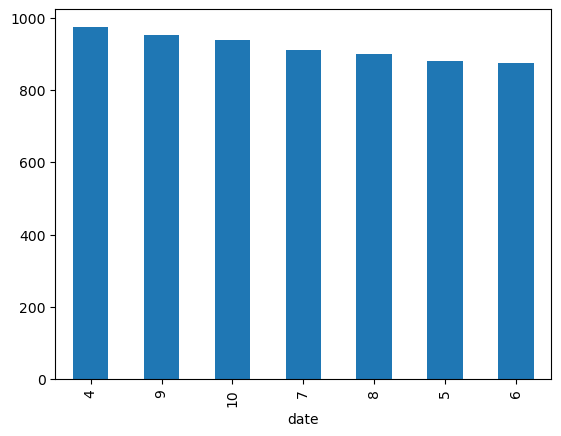

In [49]:
# which months do people golf most?
df['date'].dt.month.value_counts(ascending=False).plot(kind='bar')

plt.show() # given that the dates are random, this is going to be even

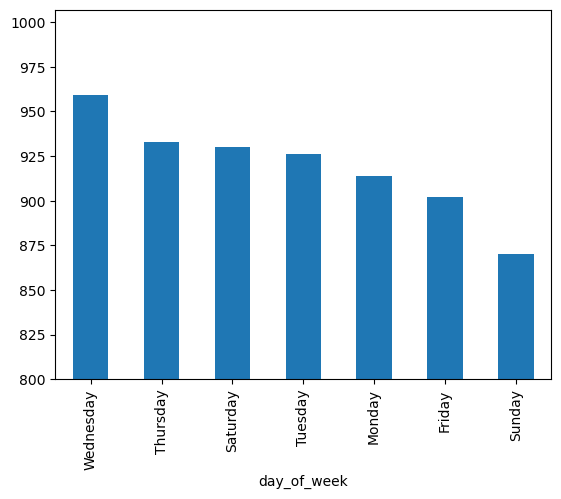

In [50]:
# most common day of week people golf
weekdays = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
day_counts = df['day_of_week'].value_counts()
day_counts.index = day_counts.index.map(weekdays)

day_counts.plot(kind='bar')
plt.ylim(800)
plt.show()

In [51]:
# which day of week do people score best?
average_score_by_weekday = df.groupby(['day_of_week'])['score'].mean().sort_values(ascending=False)
average_score_by_weekday.index = average_score_by_weekday.index.map(weekdays)

In [52]:
average_score_by_weekday

day_of_week
Saturday     72.327957
Monday       72.192560
Wednesday    72.144943
Tuesday      72.140389
Friday       72.117517
Thursday     72.065380
Sunday       72.019540
Name: score, dtype: float64

In [53]:
# top 10 best scores
df.sort_values(by='score', ascending=True).head(10)

,player_id,name,round,score,date,handicap,avg_temp,precipitation,wind_speed,day_of_week
4162,26,Branden Grace,3,62,2017-06-12,4.6,84.02,0.0,10.94,0
3882,365,Nick Faldo,22,63,2021-05-13,3.3,60.44,0.0,7.39,3
4000,39,Shane Lowry,15,63,2021-05-01,3.1,53.24,0.5,14.29,5
6397,414,Payne Stewart,8,63,2019-09-07,4.7,64.58,0.8,14.29,5
875,65,Rory McIlroy,12,63,2019-05-20,3.1,72.68,3.3,14.29,0
5416,110,Henrik Stenson,42,63,2021-06-14,3.1,65.84,13.5,6.28,0
353,5,Phil Mickelson,82,63,2022-08-20,3.8,79.34,0.0,8.08,5
4084,66,Justin Rose,25,64,2020-04-21,3.8,43.16,8.4,16.53,1
4159,86,Dustin Johnson,27,64,2021-04-15,4.0,48.02,5.6,12.99,3
5186,466,Wayne Grady,3,64,2020-08-07,1.3,71.06,0.0,6.28,4


In [54]:
# top 10 best scores in poor conditions
df_poor_conditions = df.loc[(df['avg_temp'] < 65) & (df['precipitation'] > 15) & (df['wind_speed'] > 10)]
df_poor_conditions.sort_values(by='score', ascending=True).head(10)

,player_id,name,round,score,date,handicap,avg_temp,precipitation,wind_speed,day_of_week
2096,65,Rory McIlroy,7,65,2018-04-16,3.1,39.56,39.9,19.70,0
2991,268,Camilo Villegas,2,65,2017-07-24,4.4,61.88,35.8,13.67,0
928,195,John Senden,12,66,2020-04-03,4.6,42.62,21.1,25.48,4
3801,436,Corey Pavin,18,66,2021-10-25,3.6,52.52,20.6,12.74,0
3690,259,Justin Leonard,24,66,2019-10-27,3.8,52.52,36.3,15.66,6
3425,301,Mark Calcavecchia,3,66,2017-04-25,4.7,48.74,22.6,15.91,1
3217,5,Phil Mickelson,3,67,2017-05-14,3.8,47.84,24.1,17.90,6
475,53,Louis Oosthuizen,1,67,2017-04-04,3.2,41.54,17.3,16.53,1
5197,41,Tony Finau,19,67,2022-10-13,2.3,61.16,26.2,11.87,3
3758,307,Tom Lehman,2,67,2017-05-25,3.0,53.42,16.0,14.98,3


In [55]:
# top 10 handicap values
df_sorted = df.sort_values(by='handicap', ascending=True)

# drop duplicate player_ids, keeping the one with the lowest handicap
df_sorted.drop_duplicates(subset='player_id', keep='first').head(10)

,player_id,name,round,score,date,handicap,avg_temp,precipitation,wind_speed,day_of_week
0,1,Collin Morikawa,4,67,2020-06-09,-0.9,67.28,0.0,5.59,1
2057,79,Mackenzie Hughes,2,69,2017-04-27,0.6,52.70,0.0,6.71,3
2062,84,Scottie Scheffler,3,66,2021-08-03,0.9,72.68,0.0,5.59,1
3997,85,Robert MacIntyre,2,65,2020-04-20,0.9,48.02,0.0,9.38,0
2016,38,Viktor Hovland,3,71,2020-10-01,1.1,64.94,0.0,11.43,3
6430,466,Wayne Grady,2,69,2018-07-04,1.3,84.02,0.0,6.28,2
87,88,Will Zalatoris,1,69,2022-10-25,1.5,58.64,1.3,5.59,1
3864,453,Ronan Rafferty,3,66,2019-09-26,1.6,68.00,6.9,10.50,3
3968,56,Talor Gooch,1,67,2018-07-20,2.0,72.14,0.0,9.63,4
3914,461,Gil Morgan,4,68,2021-04-07,2.0,51.62,0.0,6.96,2


In [56]:
# player with most played rounds
df.loc[df['round'] == df['round'].max()]

,player_id,name,round,score,date,handicap,avg_temp,precipitation,wind_speed,day_of_week
5313,136,Zach Johnson,114,74,2022-10-10,4.7,55.94,0.8,5.59,0


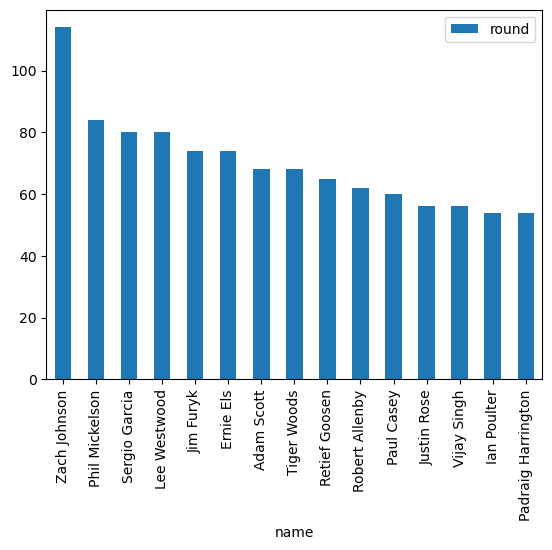

In [57]:
# players who have played the most. do a histogram
ordered_by_round_num = df.sort_values(by='round', ascending=False).drop_duplicates(subset='player_id', keep='first').head(15)

ordered_by_round_num.plot(kind='bar', x='name', y='round')
plt.show()

not satisfied with data thus far. i want it to be more realistic so i will adjust scores to be based on weather conditions to help with the ML model and i will try to skew the rounds to be on weekends only and then recalculate the round column and rerun all of the visualizations

In [58]:
# date range
all_dates = pd.date_range(start='2017-04-01', end='2022-10-30')

# add weights for days of week, higher weights for weekend
weights = np.array([4 if d.weekday() >= 5 else 1 for d in all_dates])
weights = weights / weights.sum() # normalize weights
# update day of the week and round based on weights
df['date'] = np.random.choice(all_dates, size=len(df), replace=True, p=weights)

df['day_of_week'] = df['date'].dt.day_name()
df['day_of_week_int'] =  df['date'].map(datetime.datetime.weekday)
df['round'] = df.sort_values(by='date').groupby('name').cumcount() + 1

In [59]:
df.head(10)

,player_id,name,round,score,date,handicap,avg_temp,precipitation,wind_speed,day_of_week,day_of_week_int
0,1,Collin Morikawa,4,67,2022-10-01,-0.9,67.28,0.0,5.59,Saturday,5
1,2,Jordan Spieth,14,65,2019-12-27,2.2,70.34,0.3,12.30,Friday,4
2,3,Dylan Frittelli,8,66,2022-06-04,3.5,53.60,0.0,10.50,Saturday,5
3,4,Kevin Kisner,6,70,2019-07-28,4.2,55.76,0.8,9.63,Sunday,6
4,5,Phil Mickelson,82,80,2022-07-23,3.8,77.18,29.0,10.50,Saturday,5
5,6,Adam Long,1,72,2019-02-25,6.6,79.88,24.9,6.96,Monday,0
6,7,Garrick Higgo,1,73,2019-05-05,6.1,55.94,0.0,8.70,Sunday,6
7,8,Thomas Detry,1,72,2021-08-16,5.2,73.58,0.0,13.67,Monday,0
8,9,Rikuya Hoshino,1,74,2017-08-05,5.2,51.44,0.0,12.05,Saturday,5
9,10,Matt Kuchar,23,74,2020-03-08,4.0,71.60,14.7,7.58,Sunday,6


In [60]:
df.loc[df['name']=='Phil Mickelson'].sort_values(by='round')

,player_id,name,round,score,date,handicap,avg_temp,precipitation,wind_speed,day_of_week,day_of_week_int
3412,5,Phil Mickelson,1,76,2017-04-01,3.8,80.78,0.0,9.82,Saturday,5
793,5,Phil Mickelson,2,70,2017-07-22,3.8,68.72,7.1,9.20,Saturday,5
4336,5,Phil Mickelson,3,72,2017-09-22,3.8,46.76,0.0,13.17,Friday,4
1617,5,Phil Mickelson,4,79,2017-09-25,3.8,73.58,0.0,10.50,Monday,0
3472,5,Phil Mickelson,5,72,2017-10-14,3.8,67.82,30.2,10.31,Saturday,5
...,...,...,...,...,...,...,...,...,...,...,...
5042,5,Phil Mickelson,80,69,2022-06-25,3.8,41.00,0.3,12.05,Saturday,5
4240,5,Phil Mickelson,81,70,2022-07-20,3.8,77.18,0.0,10.75,Wednesday,2
4,5,Phil Mickelson,82,80,2022-07-23,3.8,77.18,29.0,10.50,Saturday,5
5484,5,Phil Mickelson,83,69,2022-08-03,3.8,74.48,7.1,14.54,Wednesday,2


In [61]:
# change scores based on weather conditions
# this is because our raw data assumes good weather and we want to have an ML model predict score based on weather conditions
def adjust_score(df):
    score = df['score']
    temp = df['avg_temp']
    wind = df['wind_speed']
    precip = df['precipitation']
    day_of_week = df['day_of_week_int']
    rounds_played = df['round']

    if temp < 50:
        score += 3  # colder temps increase score
    elif temp > 95:
        score += 2
    elif temp > 80:
        score -= 1  # warmer temps slightly decrease score

    if wind > 15:
        score += 3  # high wind increases score
    elif wind > 10:
        score += 2  # moderate wind slightly increases score
    elif wind < 3:
        score -= 1

    if precip > 10:
        score += 3  # heavy rain significantly increases score
    elif precip > 0:
        score += 1  # light rain increases score
    elif precip == 0:
        score -= 1

    # add weekend forgiveness and make mondays and tuesdays worse scores
    if day_of_week == 5 or day_of_week == 6:
        score -= 1
    if day_of_week == 0 or day_of_week == 1:
        score += 1

    # if player plays here often, they should play better, if its their first time, they may play worse
    if rounds_played > 10:
        score -= 1
    elif rounds_played > 50:
        score -= 2
    elif rounds_played > 125:
        score -= 3
    elif rounds_played == 1:
        score += 1

    return score

In [62]:
# apply function to scores and ins
df['score'] = df.apply(adjust_score, axis=1)

In [63]:
df.loc[df['name']=='Phil Mickelson'].sort_values(by='round')

,player_id,name,round,score,date,handicap,avg_temp,precipitation,wind_speed,day_of_week,day_of_week_int
3412,5,Phil Mickelson,1,74,2017-04-01,3.8,80.78,0.0,9.82,Saturday,5
793,5,Phil Mickelson,2,70,2017-07-22,3.8,68.72,7.1,9.20,Saturday,5
4336,5,Phil Mickelson,3,76,2017-09-22,3.8,46.76,0.0,13.17,Friday,4
1617,5,Phil Mickelson,4,81,2017-09-25,3.8,73.58,0.0,10.50,Monday,0
3472,5,Phil Mickelson,5,76,2017-10-14,3.8,67.82,30.2,10.31,Saturday,5
...,...,...,...,...,...,...,...,...,...,...,...
5042,5,Phil Mickelson,80,73,2022-06-25,3.8,41.00,0.3,12.05,Saturday,5
4240,5,Phil Mickelson,81,70,2022-07-20,3.8,77.18,0.0,10.75,Wednesday,2
4,5,Phil Mickelson,82,83,2022-07-23,3.8,77.18,29.0,10.50,Saturday,5
5484,5,Phil Mickelson,83,71,2022-08-03,3.8,74.48,7.1,14.54,Wednesday,2


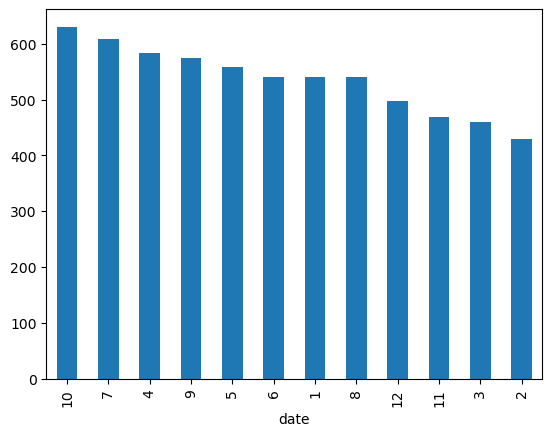

In [64]:
# which months do people golf most?
df['date'].dt.month.value_counts(ascending=False).plot(kind='bar')

plt.show() # given that the dates are random, this is going to be even

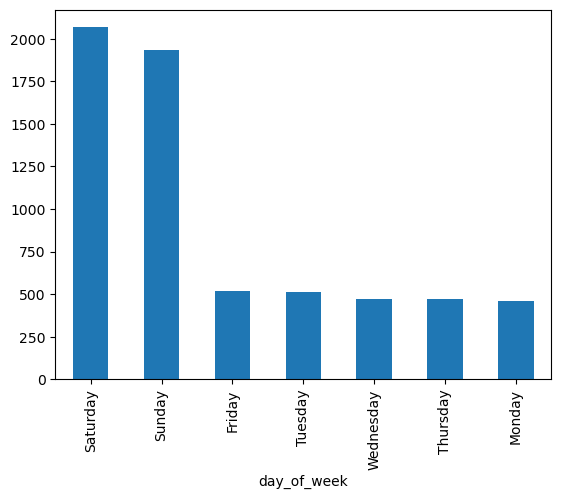

In [65]:
# most common day of week people golf
weekdays = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
day_counts = df['day_of_week'].value_counts()

day_counts.plot(kind='bar')
plt.show()

In [66]:
# which day of week do people score best?
average_score_by_weekday = df.groupby(['day_of_week'])['score'].mean().sort_values(ascending=True)
average_score_by_weekday

day_of_week
Sunday       72.061435
Saturday     72.080754
Thursday     72.479744
Friday       73.009690
Wednesday    73.050955
Monday       74.125813
Tuesday      74.226562
Name: score, dtype: float64

In [67]:
# top 10 best scores
df.sort_values(by='score', ascending=True).head(10)

,player_id,name,round,score,date,handicap,avg_temp,precipitation,wind_speed,day_of_week,day_of_week_int
353,5,Phil Mickelson,58,61,2021-02-04,3.8,79.34,0.0,8.08,Thursday,3
4162,26,Branden Grace,5,61,2018-11-11,4.6,84.02,0.0,10.94,Sunday,6
4673,45,Sergio Garcia,20,61,2018-06-02,4.0,84.38,0.0,9.63,Saturday,5
2031,53,Louis Oosthuizen,32,62,2022-03-20,3.2,78.62,0.0,9.82,Sunday,6
52,53,Louis Oosthuizen,6,62,2018-03-17,3.2,74.12,0.0,8.26,Saturday,5
3350,300,Colin Montgomerie,5,62,2018-06-30,5.1,68.18,0.0,8.70,Saturday,5
5186,466,Wayne Grady,3,62,2020-03-21,1.3,71.06,0.0,6.28,Saturday,5
5236,80,Brooks Koepka,14,62,2020-05-16,2.8,72.86,0.0,9.63,Saturday,5
5404,33,Marc Leishman,29,62,2022-07-24,3.5,71.96,0.0,8.95,Sunday,6
4853,358,David Duval,17,62,2020-06-07,3.7,70.16,0.0,9.63,Sunday,6


In [68]:
# top 10 best scores in poor conditions
df_poor_conditions = df.loc[(df['avg_temp'] < 65) & (df['precipitation'] > 15) & (df['wind_speed'] > 10)]
df_poor_conditions.sort_values(by='score', ascending=True).head(10)

,player_id,name,round,score,date,handicap,avg_temp,precipitation,wind_speed,day_of_week,day_of_week_int
2991,268,Camilo Villegas,6,69,2020-08-15,4.4,61.88,35.8,13.67,Saturday,5
2011,33,Marc Leishman,22,70,2021-06-13,3.5,54.86,38.1,14.79,Sunday,6
1285,309,Michael Campbell,17,70,2020-08-23,4.1,59.18,42.7,12.99,Sunday,6
3801,436,Corey Pavin,12,70,2021-09-02,3.6,52.52,20.6,12.74,Thursday,3
2660,69,Adam Scott,7,71,2018-03-24,4.0,64.94,42.4,14.11,Saturday,5
4694,239,Darren Clarke,17,71,2018-12-06,3.9,63.68,54.1,10.31,Thursday,3
2065,87,Daniel Berger,10,71,2021-07-11,3.2,50.36,17.0,10.75,Sunday,6
2030,52,Andy Sullivan,7,71,2020-04-05,3.0,59.18,16.0,11.43,Sunday,6
1553,191,Padraig Harrington,11,71,2018-03-31,4.1,61.16,26.2,11.87,Saturday,5
3758,307,Tom Lehman,26,71,2020-12-04,3.0,53.42,16.0,14.98,Friday,4


In [69]:
# top 10 worst scores in poor conditions
df_poor_conditions.sort_values(by='score', ascending=False).head(10)

,player_id,name,round,score,date,handicap,avg_temp,precipitation,wind_speed,day_of_week,day_of_week_int
2523,189,Mikko Ilonen,6,88,2020-12-14,6.3,35.24,39.6,19.70,Monday,0
4454,66,Justin Rose,5,87,2017-07-16,3.8,47.84,24.1,17.90,Sunday,6
441,186,Hiroshi Iwata,2,87,2021-08-29,6.6,39.56,39.9,19.70,Sunday,6
2514,76,Bernd Wiesberger,18,86,2020-08-30,5.0,40.82,15.2,22.80,Sunday,6
2736,236,Alvaro Quiros,10,86,2022-04-02,5.6,38.30,17.0,10.31,Saturday,5
1733,337,Nick Price,32,86,2020-12-02,4.6,35.24,39.6,19.70,Wednesday,2
2252,121,Adam Hadwin,10,86,2022-05-14,4.8,64.76,19.0,12.30,Saturday,5
2345,76,Bernd Wiesberger,23,86,2022-04-12,5.0,42.26,40.6,19.70,Tuesday,1
3591,398,Scott Dunlap,2,85,2019-03-16,5.7,39.56,39.9,19.70,Saturday,5
4919,17,Stewart Cink,46,85,2021-12-27,4.0,42.26,40.6,19.70,Monday,0


the data looks a lot better now and is going to be easier to work with after being slightly altered.

In [71]:
# create csv to be used for statistical analysis
df.to_csv('../data/processed/golf_cleaned.csv', index=False)